In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
users = pd.read_csv('users.csv')

In [4]:
train

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6,2019-09-02 00:00:00+08:00,127613,39,24,36,279,0,1,1,0,0,0,0,0,0,0,73534
73535,2,2019-09-02 00:00:00+08:00,127620,38,46,10,51,0,0,1,0,0,0,0,0,0,0,73535
73536,2,2019-09-02 00:00:00+08:00,127696,32,Never open,Never login,Never checkout,0,0,0,0,0,0,0,0,0,0,73536
73537,2,2019-09-02 00:00:00+08:00,127807,38,5,34,Never checkout,2,4,4,0,0,0,0,0,0,1,73537


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73539 entries, 0 to 73538
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_code                 73539 non-null  int64 
 1   grass_date                   73539 non-null  object
 2   user_id                      73539 non-null  int64 
 3   subject_line_length          73539 non-null  int64 
 4   last_open_day                73539 non-null  object
 5   last_login_day               73539 non-null  object
 6   last_checkout_day            73539 non-null  object
 7   open_count_last_10_days      73539 non-null  int64 
 8   open_count_last_30_days      73539 non-null  int64 
 9   open_count_last_60_days      73539 non-null  int64 
 10  login_count_last_10_days     73539 non-null  int64 
 11  login_count_last_30_days     73539 non-null  int64 
 12  login_count_last_60_days     73539 non-null  int64 
 13  checkout_count_last_10_days  73

In [6]:
info = pd.DataFrame(columns=['header', 'values'])

for header in train.columns:
    info = info.append(pd.Series({'header': header, 'values': train[header].unique()}), ignore_index=True)

info

,header,values
0,country_code,"[4, 6, 1, 5, 2, 3, 7]"
1,grass_date,"[2019-07-16 00:00:00+08:00, 2019-07-17 00:00:0..."
2,user_id,"[43, 102, 177, 184, 221, 246, 258, 288, 350, 4..."
3,subject_line_length,"[44, 49, 43, 32, 36, 64, 40, 48, 46, 58, 33, 3..."
4,last_open_day,"[19, 9, 14, 49, 227, 5, 13, 163, 7, 130, 27, N..."
5,last_login_day,"[6, 4, 5, 9, 8, 3, 1, 10, 58, 44, 2, 7, 382, 1..."
6,last_checkout_day,"[18, 8, 5, 53, 221, 70, 3, 28, 26, 12, 156, 2,..."
7,open_count_last_10_days,"[0, 2, 3, 7, 1, 6, 5, 4, 9, 11, 8, 10, 13, 12,..."
8,open_count_last_30_days,"[2, 9, 4, 0, 7, 6, 1, 22, 3, 8, 14, 19, 5, 12,..."
9,open_count_last_60_days,"[4, 17, 12, 1, 0, 13, 7, 14, 42, 2, 3, 15, 27,..."


In [7]:
train['grass_date'] = pd.to_datetime(train['grass_date'])
train

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6,2019-09-02 00:00:00+08:00,127613,39,24,36,279,0,1,1,0,0,0,0,0,0,0,73534
73535,2,2019-09-02 00:00:00+08:00,127620,38,46,10,51,0,0,1,0,0,0,0,0,0,0,73535
73536,2,2019-09-02 00:00:00+08:00,127696,32,Never open,Never login,Never checkout,0,0,0,0,0,0,0,0,0,0,73536
73537,2,2019-09-02 00:00:00+08:00,127807,38,5,34,Never checkout,2,4,4,0,0,0,0,0,0,1,73537


In [8]:
train.sample(10)

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
66302,4,2019-08-30 00:00:00+08:00,98540,40,10,4,Never checkout,1,1,1,1,1,3,0,0,0,1,66302
42546,2,2019-08-14 00:00:00+08:00,63744,30,25,47,434,0,1,8,0,0,2,0,0,0,0,42546
14788,1,2019-07-25 00:00:00+08:00,92364,58,3,10,70,1,4,7,3,5,27,0,0,0,0,14788
47500,2,2019-08-17 00:00:00+08:00,37153,33,1,17,27,7,23,36,0,13,25,0,1,6,1,47500
49478,1,2019-08-18 00:00:00+08:00,76401,49,97,140,269,0,1,1,0,0,0,0,0,0,0,49478
58608,1,2019-08-25 00:00:00+08:00,13325,31,40,2,2,0,0,1,13,45,95,1,6,9,0,58608
23400,3,2019-08-01 00:00:00+08:00,18642,40,13,1,1,0,1,1,8,38,40,2,10,10,1,23400
11411,3,2019-07-23 00:00:00+08:00,89532,47,28,6,40,0,4,11,11,34,64,0,0,6,1,11411
42494,5,2019-08-14 00:00:00+08:00,59613,28,76,4,9,0,0,0,5,8,8,1,2,2,0,42494
23572,2,2019-08-01 00:00:00+08:00,39402,63,25,26,65,4,6,7,2,3,8,0,0,0,0,23572


Las

In [44]:
train[~train['last_login_day'].str.isnumeric()]

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
1739,2,2019-07-16 00:00:00+08:00,90499,46,Never open,Never login,Never checkout,0,0,2,0,0,0,0,0,0,0,1739
7022,1,2019-07-21 00:00:00+08:00,18952,40,Never open,Never login,66,0,0,0,37,92,122,0,0,0,0,7022
11759,3,2019-07-23 00:00:00+08:00,104975,47,Never open,Never login,Never checkout,0,0,0,0,0,2,0,0,0,1,11759
12159,1,2019-07-23 00:00:00+08:00,127462,57,Never open,Never login,Never checkout,0,1,2,0,0,0,0,0,0,0,12159
12170,4,2019-07-24 00:00:00+08:00,79,53,Never open,Never login,43,0,0,0,1,2,7,0,0,1,0,12170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54478,3,2019-08-21 00:00:00+08:00,108338,23,Never open,Never login,55,0,4,7,0,0,15,0,0,1,0,54478
60991,2,2019-08-26 00:00:00+08:00,127711,32,Never open,Never login,Never checkout,0,0,0,0,0,0,0,0,0,0,60991
67568,1,2019-09-01 00:00:00+08:00,43929,40,Never open,Never login,9,0,0,0,2,2,3,1,1,1,0,67568
71812,3,2019-09-02 00:00:00+08:00,68171,49,Never open,Never login,Never checkout,8,23,35,0,0,0,0,0,0,1,71812


In [20]:
info = pd.DataFrame(columns=['header', 'values'])

for header in users.columns:
    info = info.append(pd.Series({'header': header, 'values': users[header].unique()}), ignore_index=True)

info

,header,values
0,user_id,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,attr_1,"[nan, 1.0, 0.0]"
2,attr_2,"[1.0, nan, 0.0]"
3,attr_3,"[0.0, 2.0, 1.0, 4.0, 3.0]"
4,age,"[nan, 50.0, 33.0, 30.0, 32.0, 36.0, 43.0, 25.0..."
5,domain,"[@gmail.com, other, @yahoo.com, @hotmail.com, ..."


Email
- target encoding (based on open_flag)

In [33]:
users.groupby('domain').count()

,user_id,attr_1,attr_2,attr_3,age
domain,,,,,
@163.com,179,28,164,179,28
@gmail.com,108332,67742,108095,108332,67742
@hotmail.com,4966,3029,4960,4966,3029
@icloud.com,791,523,790,791,523
@live.com,302,181,302,302,181
@outlook.com,412,197,404,412,197
@qq.com,763,63,658,763,63
@rocketmail.com,111,82,111,111,82
@yahoo.com,9475,5825,9434,9475,5825


Fill nan with 0

In [27]:
users['age'].dropna()

1         50.0
4         33.0
5         30.0
6         32.0
7         36.0
          ... 
127850    46.0
127851    26.0
127852    40.0
127866    24.0
127882    20.0
Name: age, Length: 78987, dtype: float64

Don't use age for now

In [29]:
train['user_id'].isin(users[users['age'].astype(bool)]['user_id']).sum()

73455

In [31]:
len(train)

73539

In [23]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127886 entries, 0 to 127885
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  127886 non-null  int64  
 1   attr_1   78987 non-null   float64
 2   attr_2   127439 non-null  float64
 3   attr_3   127886 non-null  float64
 4   age      78987 non-null   float64
 5   domain   127886 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.9+ MB


- last_open_day: 'Never open' → max
- last_login_day: 'Never login' → max
- last_checkout_day: 'Never checkout' → max

In [9]:
country_code_rank = train.groupby('country_code').apply(lambda df: df['open_flag'].sum() / df['open_flag'].count())
country_code_rank = country_code_rank.sort_values()
country_code_rank

country_code
1    0.081096
3    0.131383
2    0.191149
5    0.215318
6    0.221981
7    0.244226
4    0.349413
dtype: float64

In [10]:
country_code_encoder = {x: i for i, x in enumerate(country_code_rank.index)}
country_code_encoder

{1: 0, 3: 1, 2: 2, 5: 3, 6: 4, 7: 5, 4: 6}

In [11]:
train['grass_date'].unique()

<DatetimeArray>
['2019-07-16 00:00:00+08:00', '2019-07-17 00:00:00+08:00',
 '2019-07-18 00:00:00+08:00', '2019-07-19 00:00:00+08:00',
 '2019-07-20 00:00:00+08:00', '2019-07-21 00:00:00+08:00',
 '2019-07-22 00:00:00+08:00', '2019-07-23 00:00:00+08:00',
 '2019-07-24 00:00:00+08:00', '2019-07-25 00:00:00+08:00',
 '2019-07-26 00:00:00+08:00', '2019-07-27 00:00:00+08:00',
 '2019-07-28 00:00:00+08:00', '2019-07-29 00:00:00+08:00',
 '2019-07-30 00:00:00+08:00', '2019-08-01 00:00:00+08:00',
 '2019-08-02 00:00:00+08:00', '2019-08-03 00:00:00+08:00',
 '2019-08-04 00:00:00+08:00', '2019-08-05 00:00:00+08:00',
 '2019-08-06 00:00:00+08:00', '2019-08-07 00:00:00+08:00',
 '2019-08-08 00:00:00+08:00', '2019-08-09 00:00:00+08:00',
 '2019-08-10 00:00:00+08:00', '2019-08-11 00:00:00+08:00',
 '2019-08-12 00:00:00+08:00', '2019-08-13 00:00:00+08:00',
 '2019-08-14 00:00:00+08:00', '2019-08-15 00:00:00+08:00',
 '2019-08-16 00:00:00+08:00', '2019-08-17 00:00:00+08:00',
 '2019-08-18 00:00:00+08:00', '2019-08-1

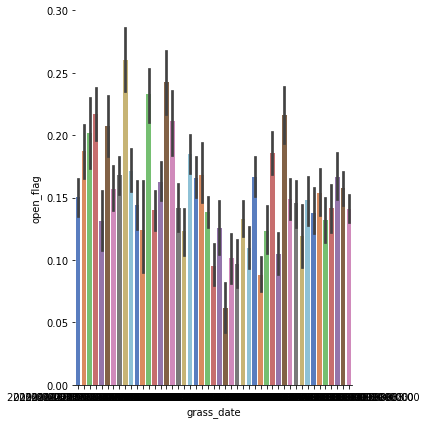

In [12]:
g = sns.catplot(
    x="grass_date", 
    y="open_flag", 
    # hue="sex", 
    data=train,
    height=6, kind="bar", palette="muted")
g.despine(left=True)

- Day of Week → target encoding

In [18]:
dayofweek = train['grass_date'].dt.dayofweek
hello = pd.DataFrame({'dayofweek': dayofweek, 'open_flag': train['open_flag']})
hello.groupby('dayofweek').mean()

,open_flag
dayofweek,
0,0.153804
1,0.150423
2,0.177097
3,0.157862
4,0.162611
5,0.117711
6,0.159834


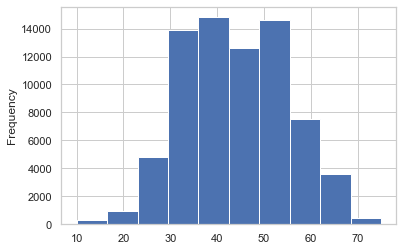

In [20]:
train['subject_line_length'].plot.hist()